# Projeto 3 Ciência dos dados
  ### Michel Haikewitsch, Tiago Mingossi e Pedro Maciel
  #### Tema: CartolaFC

In [69]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns; sns.set()  # for plot styling




import math
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as axes3d
from sklearn.mixture import GMM


from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import *
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

In [70]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Documents\2 SEMESTRE\Ciencia dos Dados\Projeto 3


In [71]:
dados=pd.read_csv('db/2016/scouts.csv',sep=',')
atletas=pd.read_csv('db/2016/Atletas.csv',sep=',')
clubes=pd.read_csv('db/2016/Clubes.csv',sep=',')
jogos= pd.read_csv('db/2016/matches-brasileirao-2016.csv',sep=',')
partidas=pd.read_csv('db/2016/Partidas.csv',sep=',')
posicoes=pd.read_csv('db/2016/Posicoes.csv',sep=',')
status=pd.read_csv('db/2016/Status.csv',sep=',')
atletas=atletas.rename(columns={'ID': "AtletaID"})
clubes=clubes.rename(columns={'ID': "ClubeID"})

dados= pd.merge(dados,atletas[['AtletaID', 'PosicaoID', 'Apelido']], on='AtletaID')
dados=pd.merge(dados,clubes[['ClubeID', 'Abreviacao']], on ="ClubeID")
columns = ['ClubeID', 'AtletaID'] 
dados=dados.rename(columns={'Abreviacao': 'Sigla'})
dados=dados.rename(columns={'Apelido': 'Atleta'})
clubes=clubes.rename(columns={'ID': "ClubeID"})

In [72]:
#dados da pontuacao dos jogadores separados por equipes
palmeiras= dados[dados.Sigla=="PAL"]
santos= dados[dados.Sigla=="SAN"]
flamengo= dados[dados.Sigla=='FLA' ]
atleticomg= dados[dados.Sigla=='CAM']
botafogo= dados[dados.Sigla=='BOT']
atleticopr= dados[dados.Sigla=='CAP']
corinthians= dados[dados.Sigla=='COR']
pontepreta= dados[dados.Sigla=='PON']
gremio= dados[dados.Sigla=='GRE']
saopaulo= dados[dados.Sigla=='SAO']
chapecoense= dados[dados.Sigla=='CHA']
cruzeiro= dados[dados.Sigla=='CRU']
fluminense= dados[dados.Sigla=='FLU']
sport= dados[dados.Sigla=='SPT']
coritiba= dados[dados.Sigla=='CFC']
vitoria= dados[dados.Sigla=='VIT']
internacional= dados[(dados.Sigla=='INT')]
figueirense= dados[(dados.Sigla=='FIG')]
santacruz= dados[(dados.Sigla=='SCZ')]
america= dados[dados.Sigla=='AME']

In [93]:
dados

,Rodada,ClubeID,AtletaID,Participou,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,...,GC,CA,CV,SG,DD,DP,GS,PosicaoID,Atleta,Sigla
0,0,294.0,37623,False,0.0,0.00,4.00,0.00,0,0,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
1,1,294.0,37623,True,5.3,5.30,6.84,2.84,0,3,...,0,0,0,1,0,0,0,3,Rafael Marques,CFC
2,2,294.0,37623,True,-0.5,2.40,6.67,-0.17,0,0,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
3,3,294.0,37623,True,2.3,2.37,6.98,0.31,1,2,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
4,4,294.0,37623,True,-2.7,1.10,5.50,-1.48,0,3,...,0,1,0,0,0,0,0,3,Rafael Marques,CFC
5,5,294.0,37623,True,8.2,2.52,7.84,2.34,2,4,...,0,1,0,0,0,0,0,3,Rafael Marques,CFC
6,6,294.0,37623,True,0.3,2.15,6.55,-1.29,1,2,...,0,1,0,0,0,0,0,3,Rafael Marques,CFC
7,7,294.0,37623,False,0.0,2.15,6.55,0.00,0,0,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
8,8,294.0,37623,True,1.1,2.00,6.50,-0.05,0,2,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC
9,9,294.0,37623,True,4.4,2.30,7.20,0.70,2,4,...,0,0,0,0,0,0,0,3,Rafael Marques,CFC


<function matplotlib.pyplot.scatter>

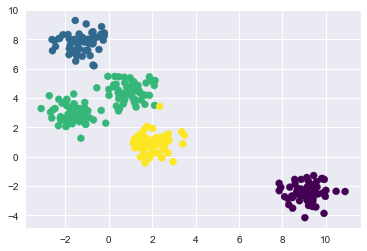

In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter


#TESTES

In [76]:
#atletas do palmeiras
atl = atletas[atletas.ClubeID==275].head()
atl

,AtletaID,Apelido,ClubeID,PosicaoID
11,38140,Fernando Prass,275,1
25,63158,Moisés,275,4
80,42411,Cuca,275,6
91,83615,Thiago Martins,275,3
92,89154,Gabriel Jesus,275,5


In [77]:
lista=np.arange(0,39,1)

palmeiras= dados[dados.Sigla=="PAL"]

ATLETASpal=[]
ATLETASpal.append(atl.Apelido)

CApal = []

for i in range (len(lista)):
    
    CA_palmeiras=palmeiras[palmeiras.Rodada==i]
    CA_palmeiras=CA_palmeiras.CA
    CApal.append(CA_palmeiras)
while len(CApal) <= len(ATLETASpal):
    data1000=pd.DataFrame()
    data1000["CA"]=CApal
    data1000["AtletaID"]=ATLETASpal
    data1000.plot.scatter(x="CA",y="AtletaID")
    
data1000
    

    

,Preco,Rodada
0,2.11,32
1,6.48,17
2,3.49,22
3,2.00,3
4,1.09,28
5,5.60,7
6,1.83,24
7,1.00,1
8,3.00,3
9,1.00,19


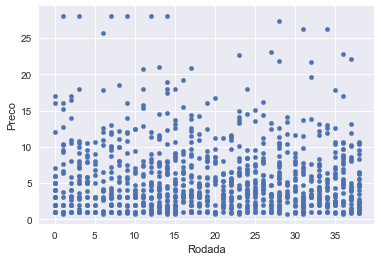

In [87]:

P=[]
R=[]
import random
my_randoms = random.sample(range(len(dados)),k=1000)
for i in my_randoms:
    p=dados.loc[i,"Rodada"]
    r=dados.loc[i,"Preco"]
    P.append(p)
    R.append(r)
Kclust=pd.DataFrame()
Kclust["Rodada"]=P
Kclust["Preco"]=R
Kclust.plot.scatter(x="Rodada",y="Preco")


#faltando adaptar para apenas jogadores do palmeiras
# erro quando se substitui dados por palmeiras

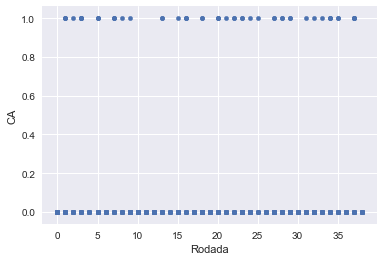

In [90]:
P=[]
R=[]
import random
my_randoms = random.sample(range(len(dados)),k=1000)
for i in my_randoms:
    p=dados.loc[i,"Rodada"]
    r=dados.loc[i,"CA"]
    P.append(p)
    R.append(r)
Kclust=pd.DataFrame()
Kclust["Rodada"]=P
Kclust["CA"]=R
Kclust.plot.scatter(x="Rodada",y="CA")
